In [1]:
import matplotlib.pyplot as plt

[Text(0, 0, 'a'), Text(0, 0, 'b'), Text(0, 0, 'c'), Text(0, 0, 'd')]

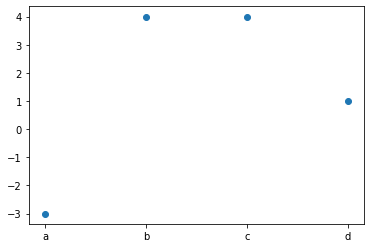

In [6]:
fig, ax = plt.subplots()

x_points=[1, 2, 3, 4]
x_labels=["a", "b", "c", "d"]
y_points=[-3, 4, 4, 1]

ax.scatter(x_points, y_points)

ax.set_xticks(x_points);
ax.set_xticklabels(x_labels)


x_points=[1.5, 2, 3, 4]

